In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
outputdir = '../../outputdata/regridded/'
ds = xr.open_dataset(outputdir+'C48L20_wind850.nc',decode_times=False)

In [4]:
ds

<xarray.Dataset>
Dimensions:  (time: 8, x: 144, x_b: 145, y: 90, y_b: 91)
Coordinates:
    lon      (y, x) float64 -178.8 -176.2 -173.8 -171.2 -168.8 -166.2 -163.8 ...
    lat      (y, x) float64 -89.0 -89.0 -89.0 -89.0 -89.0 -89.0 -89.0 -89.0 ...
    lon_b    (y_b, x_b) float64 -180.0 -177.5 -175.0 -172.5 -170.0 -167.5 ...
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 -90 -90 -90 -90 ...
  * time     (time) float64 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0
Dimensions without coordinates: x, x_b, y, y_b
Data variables:
    u850     (time, y, x) float64 0.04737 0.04737 0.04737 0.04737 0.04737 ...
    v850     (time, y, x) float64 -0.002533 -0.002533 -0.002533 -0.002533 ...

In [5]:
u = ds['u850'].values
v = ds['v850'].values

In [6]:
u.shape

(8, 90, 144)

In [7]:
lat = ds['lat'].isel(x=0).values
s_lat = 110.574e3 * 2.0
s_lon = 111.320e3 * np.cos(lat/180*np.pi) * 2.5

In [8]:
du = (np.roll(u,1,axis=-1)-np.roll(u,-1,axis=-1))
dv = (np.roll(v,1,axis=-2)-np.roll(v,1,axis=-2))

In [9]:
L = (np.abs(du)+np.abs(dv))/(s_lon+s_lat)[:,np.newaxis]

In [10]:
L.shape

(8, 90, 144)

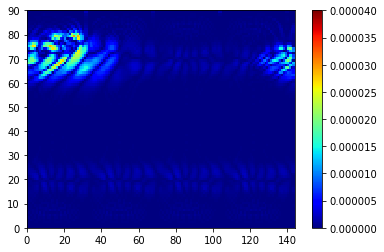

In [12]:
plt.pcolormesh(L[1,:,:],cmap='jet',vmin=0,vmax=40e-6)
plt.colorbar()